# SCC0633/SCC5908 - Processamento de Linguagem Natural
> **Docente:** Thiago Alexandre Salgueiro Pardo \
> **Estagiário PAE:** Germano Antonio Zani Jorge


# Integrantes do Grupo: GPTrouxas
> André Guarnier De Mitri - 11395579 \
> Daniel Carvalho - 10685702 \
> Fernando - 11795342 \
> Lucas Henrique Sant'Anna - 10748521 \
> Magaly L Fujimoto - 4890582

# New Section

# Abordagem Estatístico
A arquitetura da solução estatística/neural envolve duas abordagens que
serão descritas neste documento. A primeira abordagem envolve utilizar
TF-IDF e Naive Bayes. E a segunda abordagem irá utilizar Word2Vec e um
modelo transformers pré-treinado da família BERT, realizando finetuning do
modelo.

Na primeira abordagem, utilizaremos o TF-IDF, que leva em consideração a
frequência de ocorrência dos termos em um corpus e gera uma sequência de
vetores que serão fornecidos ao Naive Bayes para classificação da review como
positiva ou negativa.


Na segunda abordagem, utilizaremos o Word2Vec para vetorizar as reviews.
Após dividir em treino e teste, faremos o fine tuning de um modelo do tipo BERT
para o nosso problema e dataset específico. Com o BERT adaptado, faremos a
classificação de nossos textos, medindo o seu desempenho com F1 score e
acurácia.

![alt text](../imagens/BERT_TDIDF.png)


## # Etapas da Abordagem Estatística

1. **Bibliotecas**: Importamos as bibliotecas necessárias, considerando pandas para manipulação de dados, train_test_split para dividir o conjunto de dados em conjuntos de treinamento e teste, TfidfVectorizer para vetorização de texto usando TF-IDF, MultinomialNB para implementar o classificador Naive Bayes Multinomial e algumas métricas de avaliação.

2. **Conjunto de dados**: Carregar o conjunto de dados e armazená-lo em um dataframe usando pandas.

3. **Dividir o conjunto de dados**: Usamos `train_test_split` para dividir o DataFrame em conjuntos de treinamento e teste.

4. **TF-IDF**: Usamos `TfidfVectorizer` para converter as revisões de texto em vetores numéricos usando a técnica TF-IDF. Em seguida, ajustamos e transformamos tanto o conjunto de treinamento quanto o conjunto de teste.

5. **Naive Bayes**: Treinamos um classificador Naive Bayes Multinomial e usamos o modelo treinado para prever os sentimentos no conjunto de teste usando `predict`.

6. **Avaliação e Resultados**: Salvamos os resultados em um novo dataframe `results_df` contendo as revisões do conjunto de teste, os sentimentos originais e os sentimentos previstos pelo modelo. Além disso, avaliamos o modelo verificando algumas métricas e a matriz de confusão.




## # Baixando, Carregando os dados e Pré Processamento

1. Transformar todos os textos em lowercase \\
2. Remoção de caracteres especiais \\
3. Remoção de stop words \\
4. Lematização (Lemmatization) \\
5. Tokenização \\

In [51]:
import pandas as pd

In [52]:
db = pd.read_csv('../data/imdb_reviews.csv')
db.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
db['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [54]:
valores_ausentes = db.isnull().sum(axis=0)
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)

Quantidade de valores faltantes para cada variável do dataset:
review       0
sentiment    0
dtype: int64


In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def lowercase_text(text):
    return text.lower()

def remove_html(text):
    return re.sub(r'<[^<]+?>', '', text)

def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

def remove_punctuations(text):
    tokens_list = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for char in text:
        if char in tokens_list:
            text = text.replace(char, ' ')

    return text

def remove_emojis(text):
    emojis = re.compile("["
                        u"\U0001F600-\U0001F64F"
                        u"\U0001F300-\U0001F5FF"
                        u"\U0001F680-\U0001F6FF"
                        u"\U0001F1E0-\U0001F1FF"
                        u"\U00002500-\U00002BEF"
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"
                        u"\u3030"
                        "]+", re.UNICODE)

    text = re.sub(emojis, '', text)
    return text

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    new_text = ''
    for word in text.split():
        if word not in stop_words:
            new_text += ''.join(f'{word} ')

    return new_text.strip()

def lem_words(text):
    lemma = WordNetLemmatizer()
    new_text = ''
    for word in text.split():
        new_text += ''.join(f'{lemma.lemmatize(word)} ')

    return new_text

def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_html(text)
    text = remove_url(text)
    text = remove_punctuations(text)
    text = remove_emojis(text)
    text = remove_stop_words(text)
    text = lem_words(text)

    return text

nltk.download('stopwords')
nltk.download('wordnet')
db['review'] = db['review'].apply(preprocess_text)
db.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


# **Conjunto de Treino e teste**

In [56]:
from sklearn.model_selection import train_test_split

X= db['review']
y= db['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 12)

In [57]:
X_train

35235    disagree people saying lousy horror film good ...
36936    husband wife doctor team carole nile nelson mo...
46486    like cast pretty much however story sort unfol...
27160    movie awful bad bear expend anything word avoi...
19490    purchased blood castle dvd ebay buck knowing s...
                               ...                        
36482    strange thing see film scene work rather weakl...
40177    saw cheap dvd release title entity force since...
19709    one peculiar oft used romance movie plot one s...
38555    nothing positive say meandering nonsense huffi...
14155    low moment life bewildered depressed sitting r...
Name: review, Length: 40000, dtype: object

# **TD-IDF e Naive Bayes**

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler as encoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

naive_bayes.fit(tfidf_train, y_train)
y_pred = naive_bayes.predict(tfidf_test)




In [59]:
# Criando DataFrame com resultados
results_df = pd.DataFrame({'review': X_test, 'original sentiment': y_test, 'predicted sentiment': y_pred})
results_df.head()

,review,original sentiment,predicted sentiment
34622,hard tell noonan marshall trying ape abbott co...,negative,negative
1163,well start one reviewer said know real treat s...,positive,positive
7637,wife kid opinion absolute abc classic seen eve...,positive,positive
7045,surprise basic copycat comedy classic nutty pr...,positive,positive
43847,josef von sternberg directs magnificent silent...,positive,positive


## Avaliação

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix {model_name}')
    plt.show()

# Função para calcular e imprimir as métricas de avaliação
def print_evaluation_metrics(y_true, y_pred, model_name):
    print(f"Classification Report {model_name}:")
    print(classification_report(y_true, y_pred))


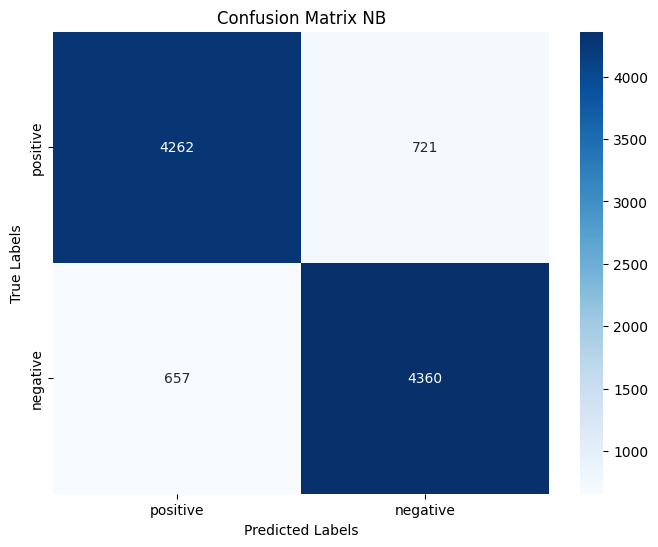

In [61]:
plot_confusion_matrix(y_test, y_pred, ['positive', 'negative'], 'NB')

In [62]:
# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred, 'NB')

Classification Report NB:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      5017
    positive       0.87      0.86      0.86      4983

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Conclusão

É possível verificar no relatório de classificação que precisão e recall estão variando entre 86 a 87%. A métrica **F1-Score** combina precisão e recall, possui valor de aproximadamente 86%, o que indica um bom equilíbrio entre precisão e recall. A **Acurácia (accuracy)** geral do modelo é de 86%, o que significa que ele classificou corretamente aproximadamente 86% de todos os exemplos no conjunto de teste.

O modelo Naive Bayes com vetorização TF-IDF conseguiu alcançar uma precisão, recall e F1-Score bastante equilibrados para ambas as classes, com uma acurácia geral de 86%. Podemos afirmar que o modelo é capaz de fazer previsões precisas em relação ao sentimento das revisões. Assim, podemos afirmar que o modelo estatístico possui um desempenho consideravelmente superior em relação à abordagem simbólica.
